<a href="https://colab.research.google.com/github/sharjeelnawaz8182/stroke_prediction/blob/main/stroke_predictioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df.head(-40)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5065,7789,Female,31.0,0,0,Yes,Private,Urban,89.01,37.4,never smoked,0
5066,40112,Female,37.0,0,0,No,Private,Urban,118.41,25.1,never smoked,0
5067,65814,Male,21.0,0,0,No,Private,Urban,138.51,24.3,never smoked,0
5068,49598,Male,80.0,0,0,Yes,Self-employed,Urban,120.03,24.3,formerly smoked,0


In [ ]:
df.drop(columns='id',inplace=True)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

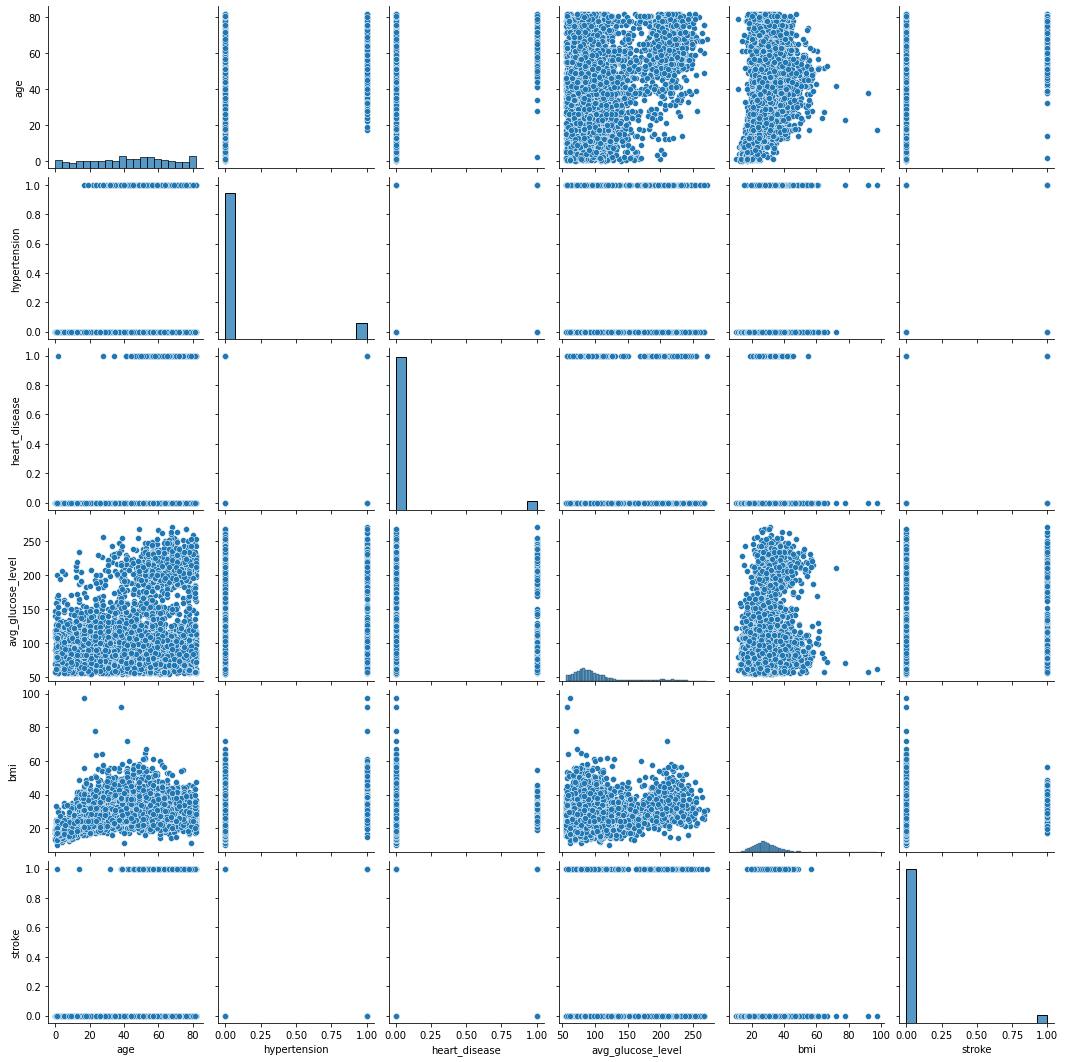

In [ ]:
sns.pairplot(df)

In [ ]:
df_new=df

In [ ]:
df_new.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


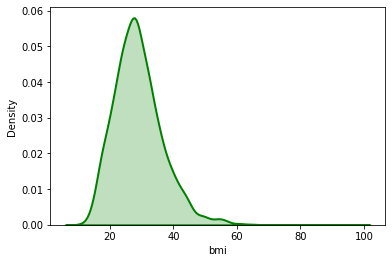

In [ ]:
sns.distplot((df_new['bmi']), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

In [ ]:
temp=df_new.bmi.quantile(.97)
df_new.drop(df_new[df_new['bmi']>temp].index,inplace=True)

In [ ]:
temp

45.3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


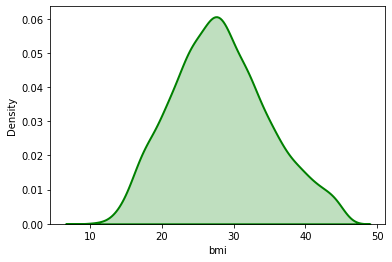

In [ ]:
sns.distplot((df_new['bmi']), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


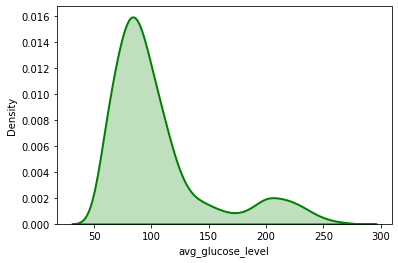

In [ ]:
sns.distplot((df_new['avg_glucose_level']), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

In [ ]:
#df_new['age_cat'] = pd.cut(df_new['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df_new['age_cat'] = pd.cut(df_new['age'], bins = [0,9,18, 29,41,53,65,200], labels = ['baby','Children', 'Teens','young', 'Adults','Mid Adults','Elderly'])
#df_new['glucose_cat'] = pd.cut(df_new['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df_new['glucose_cat'] = pd.cut(df_new['avg_glucose_level'], bins = [0,35,80,130,180,230,500], labels = ['very low','Low', 'medium', 'Normal', 'High', 'Very High'])

In [ ]:
df_new.drop(columns=['age','avg_glucose_level'],inplace=True)

In [ ]:
df_new.bmi.isnull().sum()

201

In [ ]:
p_data=df_new[df_new['bmi'].isnull()]

In [ ]:
train_full=df_new[df_new['bmi'].notnull()]

In [ ]:
p_data.isnull().sum()

gender              0
hypertension        0
heart_disease       0
ever_married        0
work_type           0
Residence_type      0
bmi               201
smoking_status      0
stroke              0
age_cat             0
glucose_cat         0
dtype: int64

In [ ]:
train_full.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_cat,glucose_cat
0,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,Elderly,High
2,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,Elderly,medium
3,Female,0,0,Yes,Private,Urban,34.4,smokes,1,Adults,Normal
4,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,Elderly,Normal
5,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,Elderly,High


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
#df_new.drop(columns='bmi',inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
train,test=train_test_split(train_full,test_size=0.20,shuffle=True)

In [ ]:
train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_cat,glucose_cat
3673,Male,0,0,Yes,Govt_job,Rural,29.2,never smoked,0,Adults,Normal
1791,Male,0,0,No,children,Rural,18.2,Unknown,0,Children,Normal
888,Female,1,0,Yes,Private,Rural,23.4,never smoked,0,Mid Adults,medium
1991,Female,0,0,Yes,Private,Rural,24.2,formerly smoked,0,young,medium
4877,Female,0,0,Yes,Private,Rural,36.2,formerly smoked,0,Mid Adults,Normal


In [ ]:
label=train.bmi
train.drop(columns=['bmi'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
true=test.bmi
test.drop(columns=['bmi'],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
model=CatBoostRegressor()

In [ ]:
model.fit(train,label,cat_features=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','glucose_cat','smoking_status','stroke','age_cat'])

Learning rate set to 0.049523
0:	learn: 6.5746282	total: 4.97ms	remaining: 4.96s
1:	learn: 6.4996654	total: 7.55ms	remaining: 3.77s
2:	learn: 6.4255551	total: 11ms	remaining: 3.65s
3:	learn: 6.3555880	total: 15.6ms	remaining: 3.88s
4:	learn: 6.2923250	total: 19.1ms	remaining: 3.81s
5:	learn: 6.2364785	total: 21.1ms	remaining: 3.49s
6:	learn: 6.1862408	total: 25.7ms	remaining: 3.65s
7:	learn: 6.1429621	total: 28.1ms	remaining: 3.49s
8:	learn: 6.0969809	total: 31.5ms	remaining: 3.46s
9:	learn: 6.0599817	total: 33.5ms	remaining: 3.31s
10:	learn: 6.0195557	total: 38.2ms	remaining: 3.44s
11:	learn: 5.9844342	total: 40.3ms	remaining: 3.32s
12:	learn: 5.9514622	total: 43.3ms	remaining: 3.29s
13:	learn: 5.9179898	total: 46.7ms	remaining: 3.29s
14:	learn: 5.8874317	total: 49.8ms	remaining: 3.27s
15:	learn: 5.8600615	total: 52.8ms	remaining: 3.25s
16:	learn: 5.8377629	total: 56.8ms	remaining: 3.28s
17:	learn: 5.8149391	total: 59.9ms	remaining: 3.27s
18:	learn: 5.7950717	total: 62.9ms	remaining: 

In [ ]:
pred=model.predict(test)
#pred=np.exp(pred)
#true=np.exp(true)
test1=pd.DataFrame()
test1['true']=true
test1['pred']=pred

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(true,pred)

31.635141151120106

In [ ]:
pred1=model.predict(train)

In [ ]:
#pred1=np.exp(pred1)
#true1=np.exp(label)
test2=pd.DataFrame()
test2['true']=true
test2['pred']=pred

In [ ]:
mean_squared_error(label,pred1)

29.07972739320686

In [ ]:
test1

,true,pred
997,31.8,29.596944
1611,31.8,28.569501
1946,28.2,30.253307
4889,42.5,27.330092
766,34.3,30.123362
...,...,...
721,23.5,27.276030
2832,37.5,26.691676
4489,24.9,29.376870
3923,31.1,28.317744


In [ ]:
p_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_cat,glucose_cat
1,Female,0,0,Yes,Self-employed,Rural,NaN,never smoked,1,Mid Adults,High
8,Female,0,0,Yes,Private,Rural,NaN,Unknown,1,Mid Adults,Low
13,Male,0,1,Yes,Private,Urban,NaN,Unknown,1,Elderly,High
19,Male,0,1,No,Govt_job,Urban,NaN,Unknown,1,Mid Adults,High
27,Male,0,0,Yes,Private,Rural,NaN,Unknown,1,Mid Adults,High


In [ ]:
p_data.drop(columns='bmi',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
p_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_cat,glucose_cat
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,Mid Adults,High
8,Female,0,0,Yes,Private,Rural,Unknown,1,Mid Adults,Low
13,Male,0,1,Yes,Private,Urban,Unknown,1,Elderly,High
19,Male,0,1,No,Govt_job,Urban,Unknown,1,Mid Adults,High
27,Male,0,0,Yes,Private,Rural,Unknown,1,Mid Adults,High


In [ ]:
pred=model.predict(p_data)

In [ ]:
p_data['bmi']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
'''sns.distplot((train['age']), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")'''

'sns.distplot((train[\'age\']), hist = False, kde = True,\n            kde_kws = {\'shade\': True, \'linewidth\': 2}, \n            label = "Normal", color ="green")'

In [ ]:
data_new = pd.concat([train_full, p_data], axis = 0)

In [ ]:
train_full['bmi'].describe()

count    4763.000000
mean       28.177871
std         6.685595
min        10.300000
25%        23.400000
50%        27.800000
75%        32.500000
max        45.300000
Name: bmi, dtype: float64

In [ ]:

data_new['bmi_cat'] = pd.cut(data_new['bmi'], bins = [0, 15, 20,24,28,33,38,10000], labels = ['weak','Underweight','not good','Ideal','perfect' ,'Overweight', 'Obesity'])

In [ ]:
data_new.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_cat,glucose_cat,bmi_cat
0,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,Elderly,High,Overweight
2,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,Elderly,medium,perfect
3,Female,0,0,Yes,Private,Urban,34.4,smokes,1,Adults,Normal,Overweight
4,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,Elderly,Normal,not good
5,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,Elderly,High,perfect


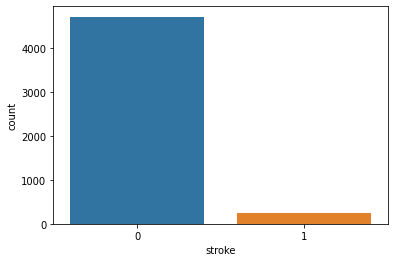

In [ ]:
sns.countplot(x='stroke', data=df)

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(sampling_strategy=0.9)

In [ ]:
y=data_new.stroke
train=data_new.drop(columns='stroke')

In [ ]:
data_new.isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
bmi               0
smoking_status    0
stroke            0
age_cat           0
glucose_cat       0
bmi_cat           0
dtype: int64

In [ ]:
X_over, y_over = oversample.fit_resample(train, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_over=pd.DataFrame(data=X_over,columns=train.columns)
y_over=pd.DataFrame(data=y_over,columns=['stroke'])


In [ ]:
y_over.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [ ]:
data_over= pd.concat([x_over,y_over], axis = 1)

In [ ]:
data_over.drop(data_over[data_over['gender'] == 'Other'].index, inplace = True)
data_over['gender'].unique()



array(['Male', 'Female'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


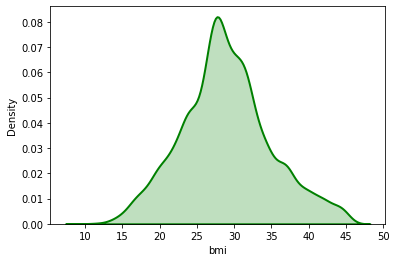

In [ ]:
sns.distplot((data_over['bmi']), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

In [ ]:
data_over.drop(data_over[data_over['bmi'] > 47].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


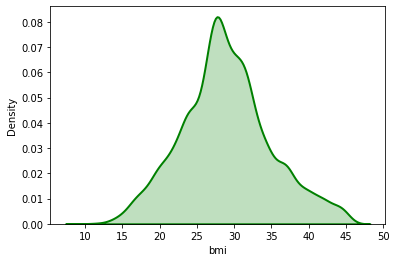

In [ ]:
sns.distplot((data_over['bmi']), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

In [ ]:
data_over.drop(columns='bmi',inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status","bmi_cat","age_cat","glucose_cat"]

In [ ]:
label_encoder = OneHotEncoder(drop='first')

In [ ]:
data_over[label_encoder.get_feature_names()]=label_encoder.fit_transform(data_over[object_cols]).toarray()

In [ ]:
label_encoder.get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Never_worked', 'x2_Private',
       'x2_Self-employed', 'x2_children', 'x3_Urban',
       'x4_formerly smoked', 'x4_never smoked', 'x4_smokes', 'x5_Obesity',
       'x5_Overweight', 'x5_Underweight', 'x5_not good', 'x5_perfect',
       'x5_weak', 'x6_Children', 'x6_Elderly', 'x6_Mid Adults',
       'x6_Teens', 'x6_baby', 'x6_young', 'x7_Low', 'x7_Normal',
       'x7_Very High', 'x7_medium'], dtype=object)

In [ ]:
len(label_encoder.get_feature_names())

26

In [ ]:
data_over.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age_cat,glucose_cat,bmi_cat,stroke,x0_Male,x1_Yes,x2_Never_worked,x2_Private,x2_Self-employed,x2_children,x3_Urban,x4_formerly smoked,x4_never smoked,x4_smokes,x5_Obesity,x5_Overweight,x5_Underweight,x5_not good,x5_perfect,x5_weak,x6_Children,x6_Elderly,x6_Mid Adults,x6_Teens,x6_baby,x6_young,x7_Low,x7_Normal,x7_Very High,x7_medium
0,Male,0,1,Yes,Private,Urban,formerly smoked,Elderly,High,Overweight,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,0,1,Yes,Private,Rural,never smoked,Elderly,medium,perfect,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Female,0,0,Yes,Private,Urban,smokes,Adults,Normal,Overweight,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Female,1,0,Yes,Self-employed,Rural,never smoked,Elderly,Normal,not good,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Male,0,0,Yes,Private,Urban,formerly smoked,Elderly,High,perfect,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_over.drop(columns=object_cols,inplace=True)

In [ ]:
y_over=data_over.stroke

In [ ]:
data_over.drop(columns='stroke',inplace=True)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(data_over,y_over,test_size=0.20,shuffle=True)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
#model=SVC(kernel='poly',degree=10)
#model=LogisticRegression(C=0.08,max_iter=500)
model=SVC(C=1.5,kernel='poly',degree=9)

In [ ]:
model.fit(train_x,train_y)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred=model.predict(test_x)

In [ ]:
log_loss(test_y,pred)

1.8867679240264066

In [ ]:
accuracy_score(test_y,pred)

0.9453734671125975